In [ ]:
!pip install transformers
!pip install torch
!pip install scikit-learn
!pip install pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 105.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 86.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 49.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 13.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 62.2 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitli

In [ ]:
import pandas as pd

# === Step 1: Baca data awal dari file Excel ===
df = pd.read_excel("gojek_10k.xlsx")
print("Jumlah data awal:", len(df))


Jumlah data awal: 10000


In [ ]:
# Menghitung jumlah data untuk tiap aspek
aspek_counts = df['aspect'].value_counts()

# Menampilkan jumlah data di tiap aspek
print("Jumlah data di tiap aspek:")
print(aspek_counts)

print("============")
# Menghitung jumlah data untuk tiap sentimen
sentimen_counts = df['sentiment'].value_counts()

# Menampilkan jumlah data di tiap sentimen
print("Jumlah data di tiap sentimen:")
print(sentimen_counts)

# Menampilkan distribusi data: jumlah sentimen untuk setiap aspek
print("Distribusi Sentimen untuk Setiap Aspek:")
sentimen_per_aspek = pd.crosstab(df['aspect'], df['sentiment'])
print(sentimen_per_aspek)



Jumlah data di tiap aspek:
aspect
services       3812
performance    3418
pricing        2770
Name: count, dtype: int64
Jumlah data di tiap sentimen:
sentiment
neutral     3615
positive    3213
negative    3172
Name: count, dtype: int64
Distribusi Sentimen untuk Setiap Aspek:
sentiment    negative  neutral  positive
aspect                                  
performance      1137     1144      1137
pricing           829     1130       811
services         1206     1341      1265


In [ ]:
# Menghitung jumlah data untuk tiap aspek
aspek_counts = df['aspect'].value_counts()

# Menampilkan jumlah data di tiap aspek
print("Jumlah data di tiap aspek:")
print(aspek_counts)

print("============")
# Menghitung jumlah data untuk tiap sentimen
sentimen_counts = df['sentiment'].value_counts()

# Menampilkan jumlah data di tiap sentimen
print("Jumlah data di tiap sentimen:")
print(sentimen_counts)

# Menampilkan distribusi data: jumlah sentimen untuk setiap aspek
print("Distribusi Sentimen untuk Setiap Aspek:")
sentimen_per_aspek = pd.crosstab(df['aspect'], df['sentiment'])
print(sentimen_per_aspek)



Jumlah data di tiap aspek:
aspect
services       3812
performance    3418
pricing        2770
Name: count, dtype: int64
Jumlah data di tiap sentimen:
sentiment
neutral     3615
positive    3213
negative    3172
Name: count, dtype: int64
Distribusi Sentimen untuk Setiap Aspek:
sentiment    negative  neutral  positive
aspect                                  
performance      1137     1144      1137
pricing           829     1130       811
services         1206     1341      1265


In [ ]:
import pandas as pd
import re

# 1. Load the labeled dataset for Gojek
df = pd.read_excel("gojek_10k.xlsx")

# 2. Dictionary untuk normalisasi kata tidak baku atau singkatan
normalization_dict = {
    'gmn': 'gimana',
    'gak': 'tidak',
    'ga': 'tidak',
    'tdk': 'tidak',
    'gk': 'tidak',
    'klo': 'kalau',
    'kalo': 'kalau',
    'klu': 'kalau',
    'yg': 'yang',
    'dgn': 'dengan',
    'dlm': 'dalam',
    'smua': 'semua',
    'brng': 'barang',
    'krg': 'kurang',
    'hr': 'hari',
    'g': 'tidak',
    'rek': 'rekening',
    'tlg': 'tolong',
    'bnr': 'benar',
    'bener': 'benar',
    'tp': 'tapi',
    'org': 'orang',
    'krn': 'karena',
    'dr': 'dari',
    'jdi': 'jadi',
    'jd': 'jadi',
    'gw': 'saya',
    'ak': 'saya',
    'sy': 'saya',
    'aq': 'saya',
    'sya': 'saya',
    'byk': 'banyak',
    'bnyk': 'banyak',
    'br': 'baru',
    'ms': 'masih',
    'msh': 'masih',
    'tf': 'transfer',
    'kt': 'kata',
    'jgn': 'jangan',
    'jng': 'jangan',
    'bgt': 'banget',
    'makasi': 'terimakasih',
    'makasih': 'terimakasih',
    'mks': 'terimakasih',
    'mksh': 'terimakasih',
    'trims': 'terimakasih',
    'btul': 'betul',
    'btl': 'betul',
    'btol': 'betul',
    'cm': 'hanya',
    'cuma': 'hanya',
    'cmn': 'hanya',
    'bgmn': 'bagaimana',
    'gmna': 'bagaimana',
    'mu': 'kamu',
    'lu': 'kamu',
    'km': 'kamu',
    'sdh': 'sudah',
    'udh': 'sudah',
    'dah': 'sudah',
    'ud': 'sudah',
    'krna': 'karena',
    'pdhl': 'padahal',
    'pdl': 'padahal',
    'tpi': 'tapi',
    'hrs': 'harus',
    'hrsnya': 'seharusnya',
    'mhn': 'mohon',
    'tkt': 'takut',
    'dng': 'dengan',
    'skrg': 'sekarang',
    'skr': 'sekarang',
    'kmrn': 'kemarin',
    'kemrn': 'kemarin',
    'kemaren': 'kemarin',
    'smoga': 'semoga',
    'smg': 'semoga',
    'bbrp': 'beberapa',
    'brp': 'berapa',
    'pke': 'pakai',
    'pk': 'pakai',
    'prnh': 'pernah',
    'prn': 'pernah',
    'lgi': 'lagi',
    'lg': 'lagi',
    'lwt': 'lewat',
    'tll': 'bodoh',
    'bdh': 'bodoh',
    'rsk': 'rusak',
    'trs': 'terus',
    'kpn': 'kapan',
    'mksd': 'maksud',
    'kyk': 'seperti',
    'spt': 'seperti',
    'dpt': 'dapat',
    'jk': 'jika',
    'plng': 'paling',
    'plg': 'paling',
    'sm': 'sama',
    'respn': 'respon',
    'rspn': 'respon',
    'smph': 'sampah',
    'pake': 'pakai',
    'thank you': 'terimakasih',
    'thanks': 'terimakasih',
    'tq': 'terimakasih',
    'brlanja': 'belanja',
    'blnj': 'belanja',
    'blnja': 'belanja',
    'blja': 'belanja',
    'knp': 'kenapa',
    'knpa': 'kenapa',
    'utk' : 'untuk',
    'sgt' : 'sangat',
    'kek' : 'seperti',
}

def normalize_word(word):
    return normalization_dict.get(word, word)

def preprocess_text(text: str) -> str:
    text = text.lower()
    text = re.sub(r"http\S+|www\S+|https\S+", '', text, flags=re.MULTILINE)
    text = re.sub(r'\@w+|\#', '', text)
    text = re.sub(r'<[^>]+>', ' ', text)
    text = re.sub(r'[^a-z0-9\s]', ' ', text)
    text = re.sub(r'\s+', ' ', text).strip()
    words = text.split()
    words = [normalize_word(w) for w in words]
    return ' '.join(words)

# Terapkan preprocessing
df['clean_content'] = df['content'].astype(str).apply(preprocess_text)

# Simpan hasilnya
df_out = df[['clean_content', 'aspect', 'sentiment']]
df_out.to_csv('Gojek_preprocessed.csv', index=False)

# Tampilkan beberapa contoh
df[['content', 'clean_content']]



,content,clean_content
0,bayar PKB motor pas ada pemutihan biar ga kena...,bayar pkb motor pas ada pemutihan biar tidak k...
1,Kenapa skrg jelek bgt ya aplikasi nya? Selalu ...,kenapa sekarang jelek banget ya aplikasi nya s...
2,"hohooo gojek gapernah gagal, banyakin promonya...",hohooo gojek gapernah gagal banyakin promonya ...
3,udah pakai gojek lama bgt tp gagal trus klo pe...,udah pakai gojek lama banget tapi gagal trus k...
4,Sangat kecewa. Pengembalian saldo gopay yang g...,sangat kecewa pengembalian saldo gopay yang ga...
...,...,...
9995,Terimakasih udah banya membantu aktifitas saya...,terimakasih udah banya membantu aktifitas saya...
9996,Lebih fleksibel,lebih fleksibel
9997,Kecewa dengan gojek,kecewa dengan gojek
9998,Mantap,mantap


In [ ]:
import pandas as pd
import torch
from transformers import AutoTokenizer, AutoModel

# 1. Load dataset hasil preprocessing Gojek
df = pd.read_csv('Gojek_preprocessed.csv')

# 2. Inisialisasi tokenizer & model IndoBERT
MODEL_NAME = 'cahya/bert-base-indonesian-522M'
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)
model = AutoModel.from_pretrained(MODEL_NAME)


# 3. Ambil 5 contoh teks pertama dari kolom 'clean_content'
texts = df['clean_content'].astype(str).tolist()[:5]

# 4. Tokenisasi dengan padding/truncation
encoded = tokenizer(
    texts,
    padding=True,
    truncation=True,
    max_length=128,
    return_tensors='pt'
)

# 5. Ekstraksi embedding BERT tanpa training (no grad)
with torch.no_grad():
    outputs = model(
        input_ids=encoded['input_ids'],
        attention_mask=encoded['attention_mask']
    )

# 6. Ambil output dari token [CLS] (vektor representasi kalimat)
cls_embeddings = outputs.last_hidden_state[:, 0, :]  # Shape: (5, 768)

# 7. Tampilkan bentuk dan sebagian vektor
print("Shape CLS embeddings:", cls_embeddings.shape)
print("Contoh 10 dimensi pertama dari vektor [CLS]:")
print(cls_embeddings[0][:10])


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/62.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/468 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/445M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/445M [00:00<?, ?B/s]

Shape CLS embeddings: torch.Size([5, 768])
Contoh 10 dimensi pertama dari vektor [CLS]:
tensor([-0.3407, -0.5395, -0.3780, -0.3912, -0.0045, -0.7145, -0.9532, -0.8873,
         0.6852, -0.0501])


In [ ]:
# gojek_sentiment_test.py

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
from transformers import AutoTokenizer, AutoModel
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import classification_report

# ====== Utils ======
def seed_everything(seed=42):
    random.seed(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)

seed_everything()

sent_map = {'neutral': 0, 'positive': 1, 'negative': 2}
aspect_map = {'services': 0, 'performance': 1, 'pricing': 2}

# ====== Dataset Class ======
class GojekDualDataset(Dataset):
    def __init__(self, texts, sent_labels, aspect_labels, tokenizer, max_length=128):
        self.texts = texts
        self.sent_labels = sent_labels
        self.aspect_labels = aspect_labels
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = str(self.texts[idx])
        enc = self.tokenizer(
            self.texts[idx],
            add_special_tokens=True,
            max_length=self.max_length,
            padding='max_length',
            truncation=True,
            return_tensors='pt'
        )
        return {
            'input_ids': enc['input_ids'].squeeze(),
            'attention_mask': enc['attention_mask'].squeeze(),
            'sentiment': torch.tensor(self.sent_labels[idx], dtype=torch.long),
            'aspect': torch.tensor(self.aspect_labels[idx], dtype=torch.long)
        }


# ====== Model Definition ======
class BertBiLSTMMultiTask(nn.Module):
    def __init__(self, model_name, hidden_dim=128, num_sent_classes=3, num_aspect_classes=3):
        super().__init__()
        self.bert = AutoModel.from_pretrained(model_name)
        for name, param in self.bert.named_parameters():
            if 'layer.11' in name or 'pooler' in name:
                param.requires_grad = True
            else:
                param.requires_grad = False

        self.lstm = nn.LSTM(input_size=self.bert.config.hidden_size,
                            hidden_size=hidden_dim,
                            bidirectional=True, batch_first=True)
        self.dropout = nn.Dropout(0.5)
        self.sent_classifier = nn.Linear(hidden_dim * 2, num_sent_classes)
        self.aspect_classifier = nn.Linear(hidden_dim * 2, num_aspect_classes)

    def forward(self, input_ids, attention_mask):
        outputs = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        x = outputs.last_hidden_state
        lstm_out, _ = self.lstm(x)
        pooled = torch.mean(lstm_out, dim=1)
        pooled = self.dropout(pooled)
        return self.sent_classifier(pooled), self.aspect_classifier(pooled)

# ====== Training Functions ======
def train_epoch(model, loader, optimizer, criterion):
    model.train()
    total_loss, total_correct_sent, total_correct_aspect = 0, 0, 0
    for batch in loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        sent_labels = batch['sentiment'].to(device)
        aspect_labels = batch['aspect'].to(device)

        optimizer.zero_grad()
        sent_logits, aspect_logits = model(input_ids, attention_mask)
        sent_loss = criterion(sent_logits, sent_labels)
        aspect_loss = criterion(aspect_logits, aspect_labels)
        loss = sent_loss + aspect_loss
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * input_ids.size(0)
        total_correct_sent += (sent_logits.argmax(dim=1) == sent_labels).sum().item()
        total_correct_aspect += (aspect_logits.argmax(dim=1) == aspect_labels).sum().item()

    return total_loss / len(loader.dataset), total_correct_sent / len(loader.dataset), total_correct_aspect / len(loader.dataset)

def evaluate(model, loader, criterion):
    model.eval()
    total_loss, total_correct_sent, total_correct_aspect = 0, 0, 0
    with torch.no_grad():
        for batch in loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            sent_labels = batch['sentiment'].to(device)
            aspect_labels = batch['aspect'].to(device)

            sent_logits, aspect_logits = model(input_ids, attention_mask)
            sent_loss = criterion(sent_logits, sent_labels)
            aspect_loss = criterion(aspect_logits, aspect_labels)
            loss = sent_loss + aspect_loss

            total_loss += loss.item() * input_ids.size(0)
            total_correct_sent += (sent_logits.argmax(dim=1) == sent_labels).sum().item()
            total_correct_aspect += (aspect_logits.argmax(dim=1) == aspect_labels).sum().item()

    return total_loss / len(loader.dataset), total_correct_sent / len(loader.dataset), total_correct_aspect / len(loader.dataset)

# ====== Main Pipeline ======

# Load dataset
print("Loading data...")
df = pd.read_csv('Gojek_preprocessed.csv')
df = df[df['sentiment'].isin(sent_map.keys()) & df['aspect'].isin(aspect_map.keys())]

texts = df['clean_content'].tolist()
sent_labels = [sent_map[s] for s in df['sentiment']]
aspect_labels = [aspect_map[a] for a in df['aspect']]

# Split TrainVal and Test
texts_trainval, texts_test, sent_trainval, sent_test, aspect_trainval, aspect_test = train_test_split(
    texts, sent_labels, aspect_labels, test_size=0.2, random_state=42, stratify=sent_labels
)

# Load tokenizer
tokenizer = AutoTokenizer.from_pretrained('indobenchmark/indobert-base-p2')
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# Cross-validation on Train+Val
print("Starting cross-validation...")
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)
fold_results = []

for fold, (train_idx, val_idx) in enumerate(kfold.split(texts_trainval, sent_trainval)):
    print(f"\nFold {fold + 1}")

    train_texts = [texts_trainval[i] for i in train_idx]
    train_sent = [sent_trainval[i] for i in train_idx]
    train_aspect = [aspect_trainval[i] for i in train_idx]

    val_texts = [texts_trainval[i] for i in val_idx]
    val_sent = [sent_trainval[i] for i in val_idx]
    val_aspect = [aspect_trainval[i] for i in val_idx]

    train_dataset = GojekDualDataset(train_texts, train_sent, train_aspect, tokenizer)
    val_dataset = GojekDualDataset(val_texts, val_sent, val_aspect, tokenizer)
    train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
    val_loader = DataLoader(val_dataset, batch_size=32)

    model = BertBiLSTMMultiTask('indobenchmark/indobert-base-p2').to(device)
    optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=2e-4)
    scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.5)
    criterion = nn.CrossEntropyLoss()

    for epoch in range(1, 11):
        train_loss, train_sent_acc, train_aspect_acc = train_epoch(model, train_loader, optimizer, criterion)
        val_loss, val_sent_acc, val_aspect_acc = evaluate(model, val_loader, criterion)
        scheduler.step()
        print(f"Epoch {epoch} — Train Loss: {train_loss:.4f}, Sent Acc: {train_sent_acc:.4f}, Aspect Acc: {train_aspect_acc:.4f}")
        print(f"             Val Loss: {val_loss:.4f}, Sent Acc: {val_sent_acc:.4f}, Aspect Acc: {val_aspect_acc:.4f}")

    fold_results.append({
        'fold': fold + 1,
        'val_sent_acc': val_sent_acc,
        'val_aspect_acc': val_aspect_acc
    })

# Train final model on full train+val set
print("\nTraining final model on full trainval set...")
trainval_dataset = GojekDualDataset(texts_trainval, sent_trainval, aspect_trainval, tokenizer)
trainval_loader = DataLoader(trainval_dataset, batch_size=32, shuffle=True)
test_dataset = GojekDualDataset(texts_test, sent_test, aspect_test, tokenizer)
test_loader = DataLoader(test_dataset, batch_size=32)

model = BertBiLSTMMultiTask('indobenchmark/indobert-base-p2').to(device)
optimizer = optim.Adam(filter(lambda p: p.requires_grad, model.parameters()), lr=2e-4)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=3, gamma=0.5)
criterion = nn.CrossEntropyLoss()

for epoch in range(1, 11):
    train_loss, train_sent_acc, train_aspect_acc = train_epoch(model, trainval_loader, optimizer, criterion)
    scheduler.step()
    print(f"Final Epoch {epoch} — Loss: {train_loss:.4f}, Sent Acc: {train_sent_acc:.4f}, Aspect Acc: {train_aspect_acc:.4f}")

# Evaluate on test set
print("\nEvaluating on test set...")
model.eval()
all_sent_preds, all_sent_labels = [], []
all_aspect_preds, all_aspect_labels = [], []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        sent_labels = batch['sentiment'].to(device)
        aspect_labels = batch['aspect'].to(device)

        sent_logits, aspect_logits = model(input_ids, attention_mask)
        sent_preds = torch.argmax(sent_logits, dim=1)
        aspect_preds = torch.argmax(aspect_logits, dim=1)

        all_sent_preds.extend(sent_preds.cpu().numpy())
        all_sent_labels.extend(sent_labels.cpu().numpy())
        all_aspect_preds.extend(aspect_preds.cpu().numpy())
        all_aspect_labels.extend(aspect_labels.cpu().numpy())

print("=== Test Set Sentiment Report ===")
print(classification_report(all_sent_labels, all_sent_preds, target_names=sent_map.keys()))
print("=== Test Set Aspect Report ===")
print(classification_report(all_aspect_labels, all_aspect_preds, target_names=aspect_map.keys()))


Loading data...


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Starting cross-validation...

Fold 1


pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/498M [00:00<?, ?B/s]

Epoch 1 — Train Loss: 0.8887, Sent Acc: 0.7433, Aspect Acc: 0.8969
             Val Loss: 0.5064, Sent Acc: 0.8938, Aspect Acc: 0.9475
Epoch 2 — Train Loss: 0.4114, Sent Acc: 0.9038, Aspect Acc: 0.9665
             Val Loss: 0.4458, Sent Acc: 0.8988, Aspect Acc: 0.9563
Epoch 3 — Train Loss: 0.3105, Sent Acc: 0.9287, Aspect Acc: 0.9747
             Val Loss: 0.3401, Sent Acc: 0.9250, Aspect Acc: 0.9738
Epoch 4 — Train Loss: 0.2348, Sent Acc: 0.9503, Aspect Acc: 0.9831
             Val Loss: 0.3236, Sent Acc: 0.9287, Aspect Acc: 0.9750
Epoch 5 — Train Loss: 0.1886, Sent Acc: 0.9611, Aspect Acc: 0.9868
             Val Loss: 0.3387, Sent Acc: 0.9363, Aspect Acc: 0.9800
Epoch 6 — Train Loss: 0.1653, Sent Acc: 0.9636, Aspect Acc: 0.9878
             Val Loss: 0.3487, Sent Acc: 0.9313, Aspect Acc: 0.9738
Epoch 7 — Train Loss: 0.1383, Sent Acc: 0.9700, Aspect Acc: 0.9897
             Val Loss: 0.3381, Sent Acc: 0.9375, Aspect Acc: 0.9800
Epoch 8 — Train Loss: 0.1207, Sent Acc: 0.9744, Aspect 

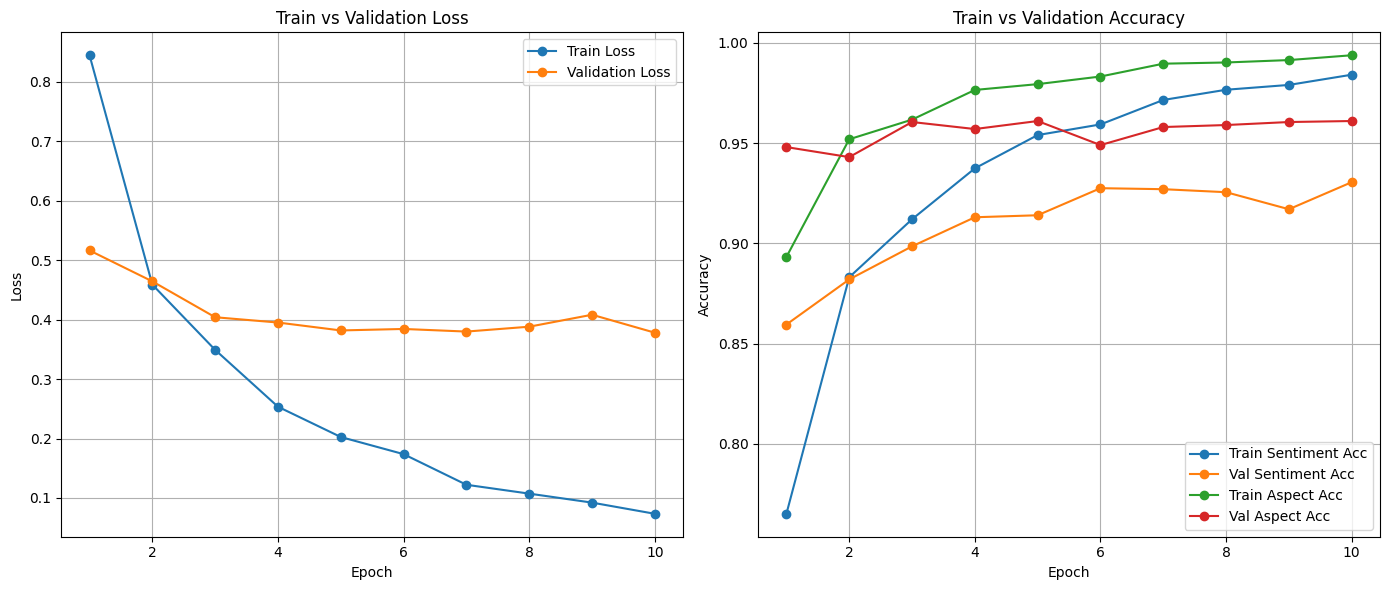

In [ ]:
import matplotlib.pyplot as plt

# Data berdasarkan hasil training dari gambar
epochs = list(range(1, 11))

train_loss = [0.8444, 0.4587, 0.3490, 0.2534, 0.2025, 0.1737, 0.1222, 0.1073, 0.0922, 0.0734]
val_loss =   [0.5162, 0.4642, 0.4039, 0.3950, 0.3817, 0.3842, 0.3798, 0.3880, 0.4081, 0.3779]

train_sent_acc = [0.7651, 0.8831, 0.9120, 0.9374, 0.9540, 0.9593, 0.9715, 0.9766, 0.9790, 0.9841]
val_sent_acc =   [0.8595, 0.8820, 0.8985, 0.9130, 0.9140, 0.9275, 0.9270, 0.9255, 0.9170, 0.9305]

train_aspect_acc = [0.8932, 0.9519, 0.9617, 0.9765, 0.9794, 0.9832, 0.9896, 0.9902, 0.9914, 0.9938]
val_aspect_acc =   [0.9480, 0.9430, 0.9605, 0.9570, 0.9610, 0.9490, 0.9580, 0.9590, 0.9605, 0.9610]

# Plotting
plt.figure(figsize=(14, 6))

# Subplot 1: Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, label='Train Loss', marker='o')
plt.plot(epochs, val_loss, label='Validation Loss', marker='o')
plt.title('Train vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Subplot 2: Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, train_sent_acc, label='Train Sentiment Acc', marker='o')
plt.plot(epochs, val_sent_acc, label='Val Sentiment Acc', marker='o')
plt.plot(epochs, train_aspect_acc, label='Train Aspect Acc', marker='o')
plt.plot(epochs, val_aspect_acc, label='Val Aspect Acc', marker='o')
plt.title('Train vs Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


=== Sentimen ===
              precision    recall  f1-score   support

     neutral       0.90      0.96      0.93       723
    positive       0.97      0.92      0.94       643
    negative       0.96      0.94      0.95       634

    accuracy                           0.94      2000
   macro avg       0.94      0.94      0.94      2000
weighted avg       0.94      0.94      0.94      2000


=== Aspek ===
              precision    recall  f1-score   support

    services       0.97      0.97      0.97       783
 performance       0.99      0.99      0.99       684
     pricing       0.97      0.97      0.97       533

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



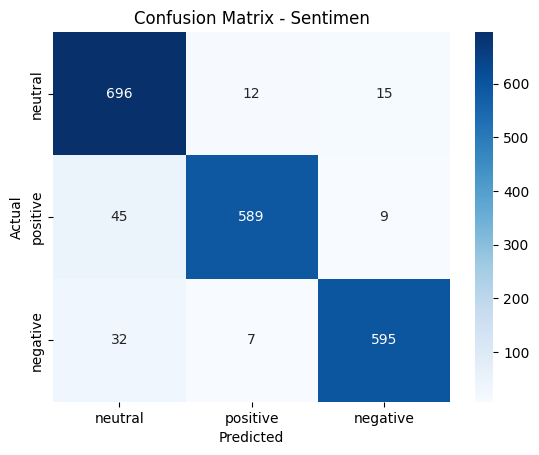

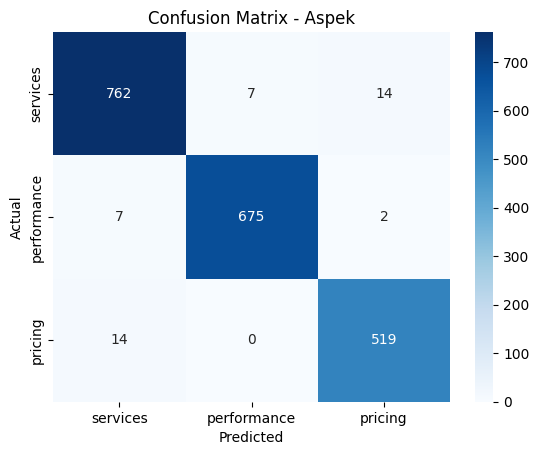

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# 1. Evaluasi
model.eval()
all_sent_preds, all_sent_labels = [], []
all_aspect_preds, all_aspect_labels = [], []

with torch.no_grad():
    for batch in test_loader:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        sent_labels = batch['sentiment'].to(device)
        aspect_labels = batch['aspect'].to(device)

        sent_logits, aspect_logits = model(input_ids, attention_mask)
        sent_preds = torch.argmax(sent_logits, dim=1)
        aspect_preds = torch.argmax(aspect_logits, dim=1)

        all_sent_preds.extend(sent_preds.cpu().numpy())
        all_sent_labels.extend(sent_labels.cpu().numpy())
        all_aspect_preds.extend(aspect_preds.cpu().numpy())
        all_aspect_labels.extend(aspect_labels.cpu().numpy())

# 2. Laporan klasifikasi
print("=== Sentimen ===")
print(classification_report(all_sent_labels, all_sent_preds, target_names=sent_map.keys()))
print("\n=== Aspek ===")
print(classification_report(all_aspect_labels, all_aspect_preds, target_names=aspect_map.keys()))

# 3. Confusion Matrix Visualisasi
def plot_confusion_matrix(y_true, y_pred, labels, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(title)
    plt.show()

plot_confusion_matrix(all_sent_labels, all_sent_preds, list(sent_map.keys()), "Confusion Matrix - Sentimen")
plot_confusion_matrix(all_aspect_labels, all_aspect_preds, list(aspect_map.keys()), "Confusion Matrix - Aspek")


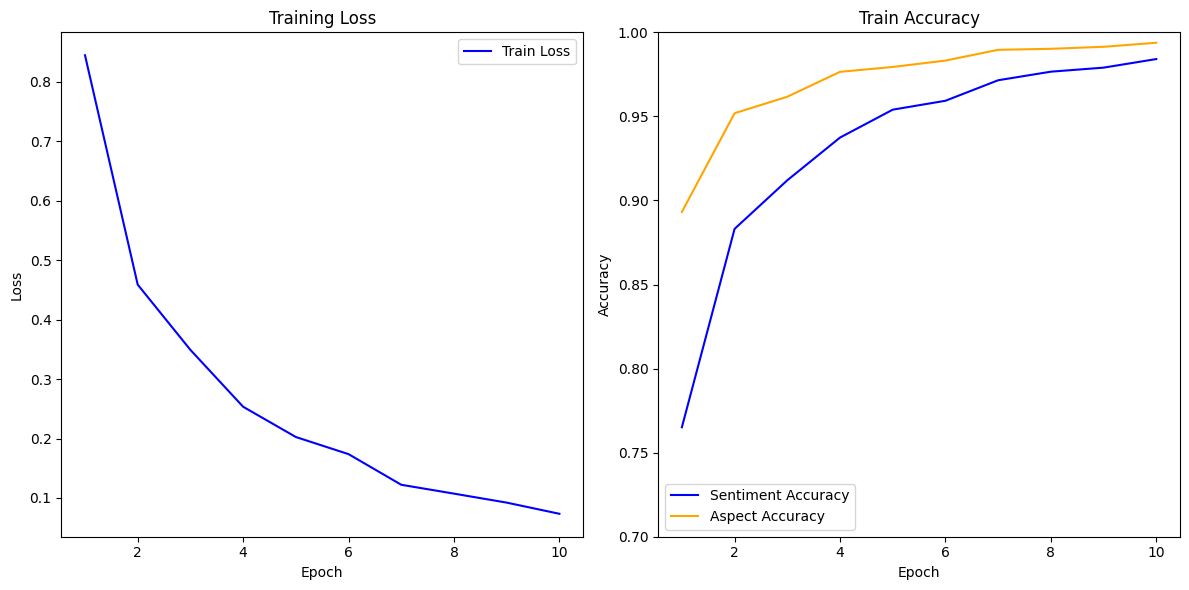

In [ ]:
import matplotlib.pyplot as plt

# Data hasil training 10 epoch
epochs = list(range(1, 11))
losses = [0.8444, 0.4587, 0.3490, 0.2534, 0.2025, 0.1737, 0.1222, 0.1073, 0.0922, 0.0734]
sent_acc = [0.7651, 0.8831, 0.9120, 0.9374, 0.9540, 0.9593, 0.9715, 0.9766, 0.9790, 0.9841]
aspect_acc = [0.8932, 0.9519, 0.9617, 0.9765, 0.9794, 0.9832, 0.9896, 0.9902, 0.9914, 0.9938]

# Plotting
plt.figure(figsize=(12, 6))

# Loss
plt.subplot(1, 2, 1)
plt.plot(epochs, losses, color='blue', label='Train Loss')
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(epochs, sent_acc, label='Sentiment Accuracy', color='blue')
plt.plot(epochs, aspect_acc, label='Aspect Accuracy', color='orange')
plt.title('Train Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0.7, 1.0)
plt.legend()

plt.tight_layout()
plt.show()
